### Importing Relevent Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

### Loading the Data.

In [15]:

car_raw = pd.read_csv('D:\DOWNLOAD\CAR_ANYLIST\Data\Car_Raw_Data.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


* Brand - Hãng xe.
* Price - giá của xe và cột mục tiêu .
* Body - loại xe.
* Mileage - Số km xe đã đi. vì đây là dự án dự đoán giá xe cũ. Có nhiều khả năng là xe đã đi nhiều nhất nên giá sẽ thấp hơn.
* EngineV - Thể tích động cơ xe, xe thể thao có động cơ lớn hơn và có giá cao hơn, còn xe tiết kiệm nhiên liệu có động cơ nhỏ hơn và giá thấp hơn.
* Registration - Xe có giấy đăng ký hay không.
* Year - Năm chủ sở hữu đầu tiên mua xe. Xe càng cũ thì giá càng rẻ.
* Model - Kiểu xe.

### Xử lý trước dữ liệu thô

In [21]:
# getting descriptive stats
car_raw.describe(include='all')
# use include = all for getting categorical column also.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Vì cột `Model` chứa `312` mẫu xe duy nhất và sau khi chuyển đổi thành biến giả, kích thước dữ liệu của chúng ta sẽ rất cao, nó sẽ tăng thêm `312` cột vào dữ liệu của chúng ta.

Ngoài ra, tôi còn đưa ra một giả định khác rằng đây là tập dữ liệu giá xe cũ hoặc xe đã qua sử dụng, vì vậy khi xe cũ đi, chúng ta thực sự không quan tâm đến mẫu xe đó là gì, nhưng `Thương hiệu` của xe sẽ tạo ra một số tác động.

Đó là lý do tại sao hiện tại tôi sẽ xóa cột `Model` khỏi tập dữ liệu.

In [ ]:
# dropping the model column
car_raw.drop('Model', axis=1, inplace=True)
car_raw.describe(include='all')

### Kiểm tra các giá trị bị thiếu

In [6]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64


305 / 5.000
`Price` và `EngineV` chỉ là cột có giá trị bị thiếu. nhưng một số ít trong số chúng bị thiếu.

`Quy tắc ngón tay cái` nói rằng nếu chúng ta đang bỏ hoặc xóa `5%` hoặc ít hơn dữ liệu đó khỏi dữ liệu gốc. chúng ta sẽ xóa dữ liệu đó một cách an toàn.

Trong trường hợp này `172/4344` `=` `0.0395`, chúng ta đang bỏ khoảng `3%` tổng dữ liệu,

In [10]:
# dropping missing values
car_raw.dropna(axis=0, inplace=True)

# axis=1 means we are removing rows not columns
print('Mssing value Droped')

Mssing value Droped


### Khám phá Phân phối Xác suất. (PDF)

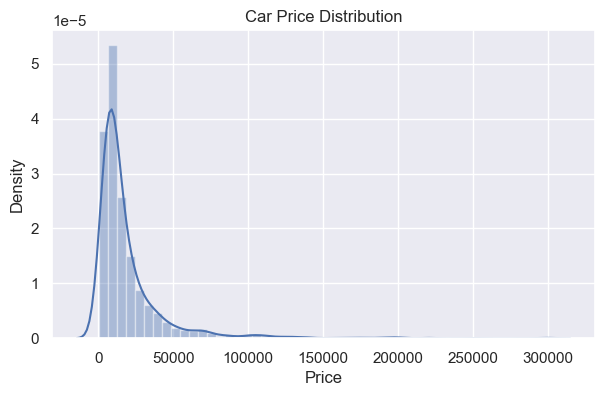

In [45]:
plt.figure(figsize=(7,4))
sns.distplot(car_raw['Price']);
plt.title('Car Price Distribution');

Nếu chúng ta kiểm tra phạm vi giá, các giá trị nằm theo thứ tự rất lạ. Ngoài ra còn có một số giá trị ngoại lệ.

### Xử lý giá trị ngoại lai.

Một cách để thực hiện điều đó là lấy 99% tổng dữ liệu và loại bỏ 1% dữ liệu.

Đối với điều đó, tôi sẽ sử dụng phương pháp pandas `.quantile()` methode 

In [ ]:
q = car_raw['Price'].quantile(q = 0.99) # nó trả về một giá trị duy nhất
q

np.float64(129812.51999999981)

In [31]:
# updating the data
car_1 = car_raw[car_raw['Price']<q]
car_1.describe() # checking the data.

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


Bây giờ nếu chúng ta so sánh từ mô tả ở trên thì chúng ta có thể thấy giá trị tối đa của `Price` đã được dai ra, nhưng nó cũng rất xa so với giá trị trung bình, nhưng vẫn có thể chấp nhận được.

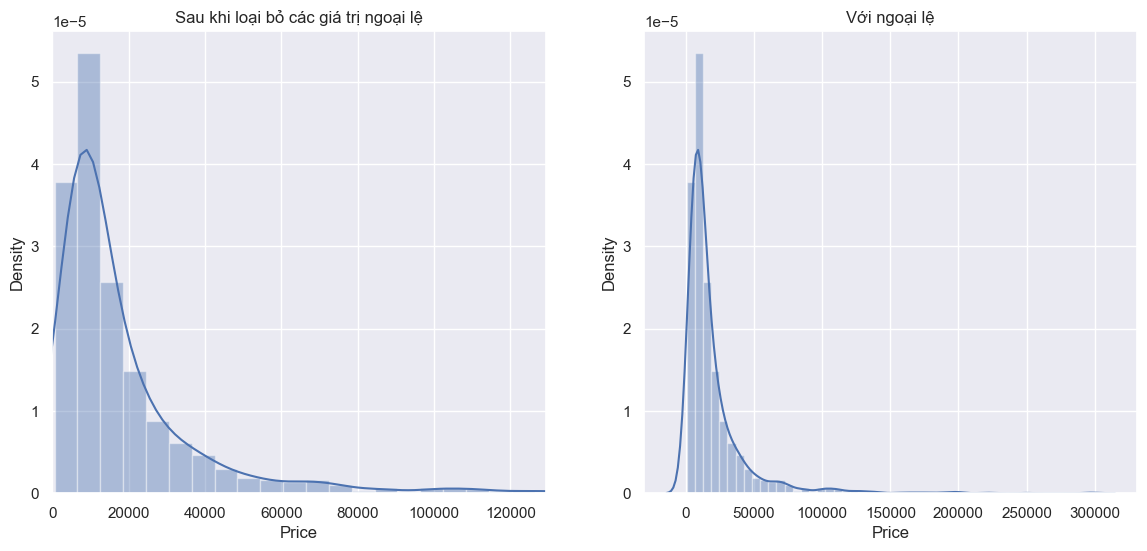

In [33]:
plt.figure(figsize=(14,6))
# vẽ đồ thị phân phối với seaborn
# vẽ giá Cột mục tiêu
plt.subplot(1,2,1)
sns.distplot(car_raw['Price']);
plt.title('Sau khi loại bỏ các giá trị ngoại lệ');
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.distplot(car_raw['Price']);
plt.title('Với ngoại lệ');

Bây giờ những giá trị ngoại lệlệ có thể thấy Giá theo cách tổng quát hơn.

###  vấn đề tương tự với các cột khác như  `Mileage`, `EngineV` và `Year`

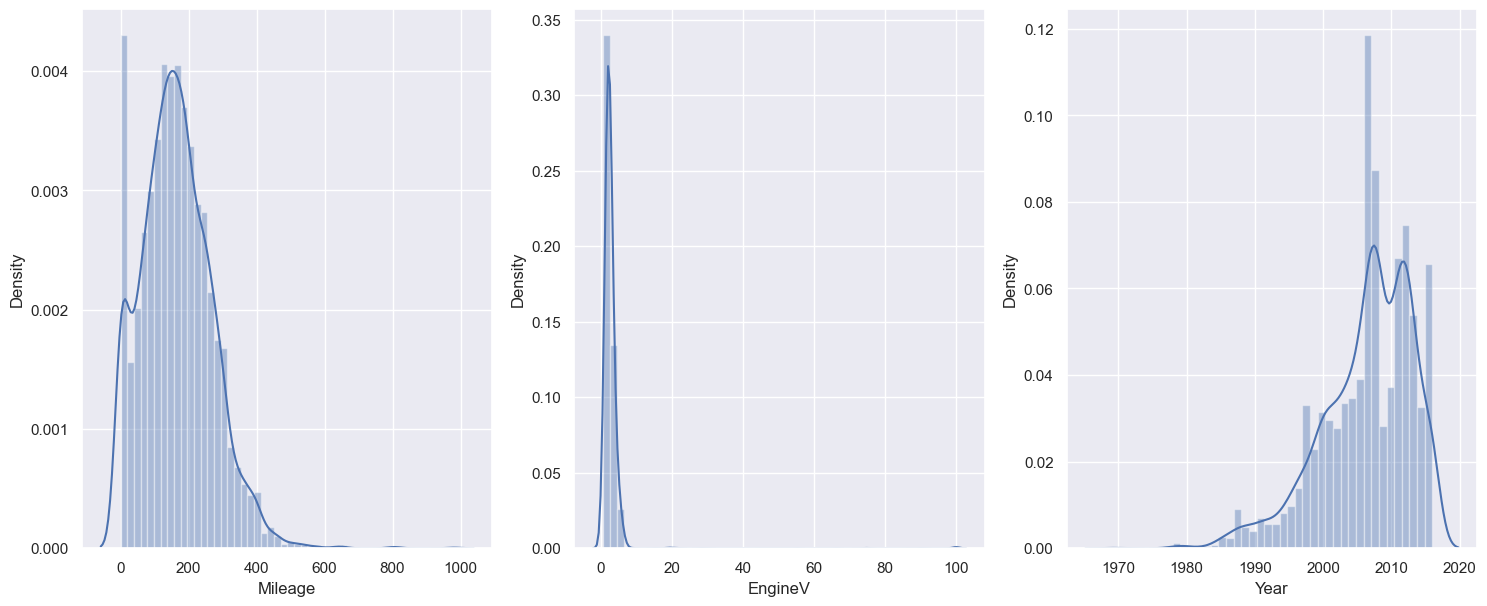

In [34]:
# Biểu diễn các cột số khác
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.distplot(car_1['Mileage']);

plt.subplot(1,3,2)
sns.distplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.distplot(car_raw['Year']);

 CChỉ giữ lại 99% dữ liệu

In [35]:
## Mileage Column.
q = car_1['Mileage'].quantile(0.99)  # it return a single value
car_2  = car_1[car_1['Mileage']<q]

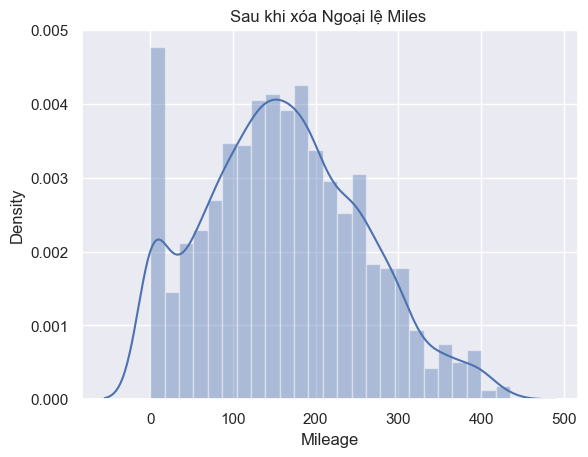

In [38]:
# vẽ biểu đồ cột Mileage
sns.distplot(car_2['Mileage']);
plt.title('Sau khi xóa Ngoại lệ Miles ');

## The EngineV 

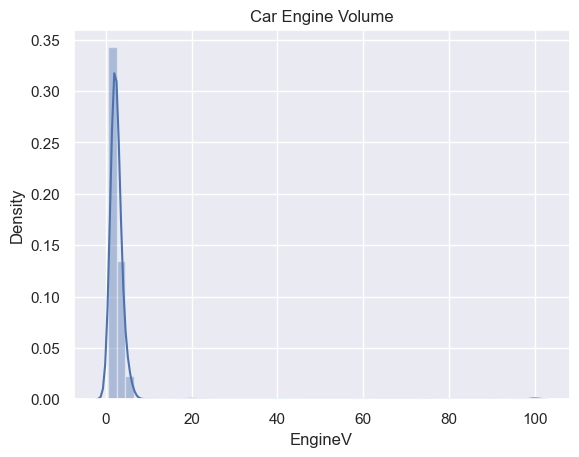

In [39]:
# vẽ biểu đồ cột enginev
sns.distplot(car_2['EngineV']);
plt.title('Car Engine Volume');

Qua sơ đồ thể tích động cơ xe cho thấy dữ liệu có vẻ sai , Khoảng cách theo được Tra Google thì nó nằm trong khoảng `0.6 đến 6.5` cho thể tích động cơ , Không có  100

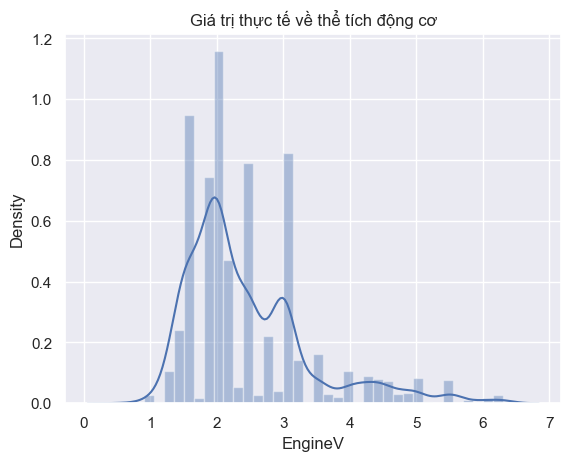

In [40]:
#  thể tích động cơ tối đa có thể đạt được là 6,5

car_3 = car_2[car_2['EngineV']<6.5]

# plotting the values again
sns.distplot(car_3['EngineV']);
plt.title('Giá trị thực tế về thể tích động cơ');

## `Year`

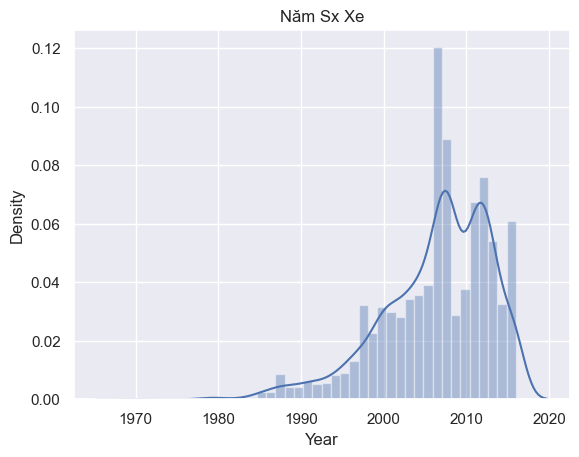

In [42]:
#vẽ biểu đồ cột năm
sns.distplot(car_3['Year']);
plt.title('Năm Sx Xe');

Các phần lớn xe đều mới hơn, được sản xuất sau năm 2000, nhưng cũng có một số ít xe được sản xuất trước năm 1990.
Loại bỏ ngoại lễj các giá trị có số năm cũ hơn 

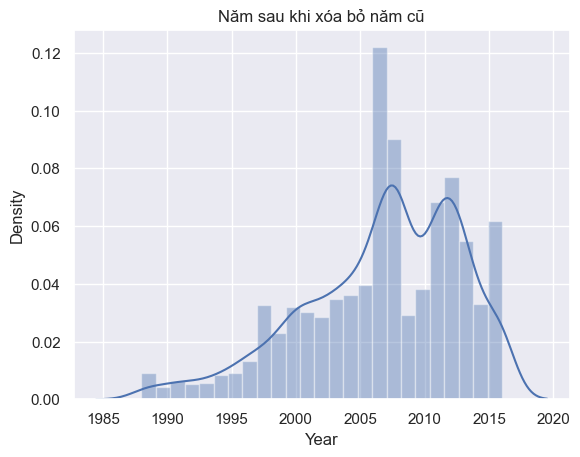

In [44]:
# Giữ lại 1% Data và Loại bỏ 99% 
q = car_3['Year'].quantile(0.01);
car_4 = car_3[car_3['Year']>q] # xóa dữ liệu phần trăm thứ 1

# potting again
sns.distplot(car_4['Year']);
plt.title('Năm sau khi xóa bỏ năm cũ');


In [49]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Từ đây tôi có thể thấy rằng chỉ số (index) đang hơi lộn xộn. Điều này xảy ra do chúng ta đã loại bỏ một số hàng từ dữ liệu nhưng chỉ số vẫn hiển thị từ dữ liệu thô. Đó là lý do tại sao giá trị chỉ số cuối cùng không khớp với tổng số hàng.

In [50]:
# thiết lập lại các chỉ mục
car_clean = car_4.reset_index(drop=True)

# kiểm tra dữ liệu
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Hiển thị thống kê mô tả Tât cả các cột trong Data 

In [51]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Data sau khi sàn lộc thì các hàng đang hoàn chỉnh


In [52]:
car_raw.shape[0] -  car_clean.shape[0]

158

Đã xóa tổng cộng 158 hàng khỏi dữ liệu thô.

Nhưng số ban đầu là `158 + 172 = 330`. vì  đã xóa giá trị null ở phần đầu.

In [53]:
# lưu dữ liệu cho module tiếp theo

car_clean.to_csv('Car_cleaned.csv', index=False)
print('Data Saved')

Data Saved


LƯU DỮ LIỆU SAU KHI CHANGE Là 'Car_cleaned.cvs'
